# Real Estate Housing Price Prediction

This task involves predicting the price of real estate properties based on various features that influence the value of a property. The dataset contains several attributes of real estate properties such as square footage, the number of bedrooms, bathrooms, floors, the year the property was built, whether the property has a garden or pool, the size of the garage, the location score, and the distance from the city center.

The goal is to build a regression model that can predict the Price of a property based on the provided features.

In [156]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the data
housing_data = pd.read_csv('real_estate_dataset.csv')

In [3]:
#Print the 5 rows of the dataset
housing_data.head()

ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  Year_Built  \
0   1   143.635030             1              3           3        1967   
1   2   287.678577             1              2           1        1949   
2   3   232.998485             1              3           2        1923   
3   4   199.664621             5              2           2        1918   
4   5    89.004660             4              3           3        1999   

   Has_Garden  Has_Pool  Garage_Size  Location_Score  Distance_to_Center  \
0           1         1           48        8.297631            5.935734   
1           0         1           37        6.061466           10.827392   
2           1         0           14        2.911442            6.904599   
3           0         0           17        2.070949            8.284019   
4           1         0           34        1.523278           14.648277   

           Price  
0  602134.816747  
1  591425.135386  
2  464478.696880  
3  583105.655996  
4  619879.142523

In [4]:
#Dimensions of the data
housing_data.shape

(500, 12)

There are 500 entries and 12 attributes in the dataset

In [5]:
#Datatypes of the dataset
housing_data.dtypes

ID                      int64
Square_Feet           float64
Num_Bedrooms            int64
Num_Bathrooms           int64
Num_Floors              int64
Year_Built              int64
Has_Garden              int64
Has_Pool                int64
Garage_Size             int64
Location_Score        float64
Distance_to_Center    float64
Price                 float64
dtype: object

#### Dataset Columns
1. ID: A unique identifier for each property.
2. Square_Feet: The area of the property in square meters.
3. Num_Bedrooms: The number of bedrooms in the property.
4. Num_Bathrooms: The number of bathrooms in the property.
5. Num_Floors: The number of floors in the property.
6. Year_Built: The year the property was built.
7. Has_Garden: Indicates whether the property has a garden (1 for yes, 0 for no).
8. Has_Pool: Indicates whether the property has a pool (1 for yes, 0 for no).
9. Garage_Size: The size of the garage in square meters.
10. Location_Score: A score from 0 to 10 indicating the quality of the neighborhood (higher scores indicate better neighborhoods).
11. Distance_to_Center: The distance from the property to the city center in kilometers.
12. Price: The target variable that represents the price of the property. This is the value we aim to predict.

In [6]:
#Statistical Summary of the dataset
housing_data.describe()

ID  Square_Feet  Num_Bedrooms  Num_Bathrooms  Num_Floors  \
count  500.000000   500.000000    500.000000     500.000000  500.000000   
mean   250.500000   174.640428      2.958000       1.976000    1.964000   
std    144.481833    74.672102      1.440968       0.820225    0.802491   
min      1.000000    51.265396      1.000000       1.000000    1.000000   
25%    125.750000   110.319923      2.000000       1.000000    1.000000   
50%    250.500000   178.290937      3.000000       2.000000    2.000000   
75%    375.250000   239.031220      4.000000       3.000000    3.000000   
max    500.000000   298.241199      5.000000       3.000000    3.000000   

        Year_Built  Has_Garden    Has_Pool  Garage_Size  Location_Score  \
count   500.000000  500.000000  500.000000   500.000000      500.000000   
mean   1957.604000    0.536000    0.492000    30.174000        5.164410   
std      35.491781    0.499202    0.500437    11.582575        2.853489   
min    1900.000000    0.000000    0.000000    10.000000        0.004428   
25%    1926.000000    0.000000    0.000000    20.000000        2.760650   
50%    1959.000000    1.000000    0.000000    30.000000        5.206518   
75%    1988.000000    1.000000    1.000000    41.000000        7.732933   
max    2022.000000    1.000000    1.000000    49.000000        9.995439   

       Distance_to_Center          Price  
count          500.000000     500.000000  
mean            10.469641  582209.629529  
std              5.588197  122273.390345  
min              0.062818  276892.470136  
25%              6.066754  503080.344140  
50%             10.886066  574724.113347  
75%             15.072590  665942.301274  
max             19.927966  960678.274291

In [7]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [8]:
#Check for missing values
housing_data.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

Currently there are no missing values in the dataset

In [9]:
#Check for duplicates 
housing_data.duplicated().sum()

np.int64(0)

Currently there are no duplicate values in the dataset

<Axes: >

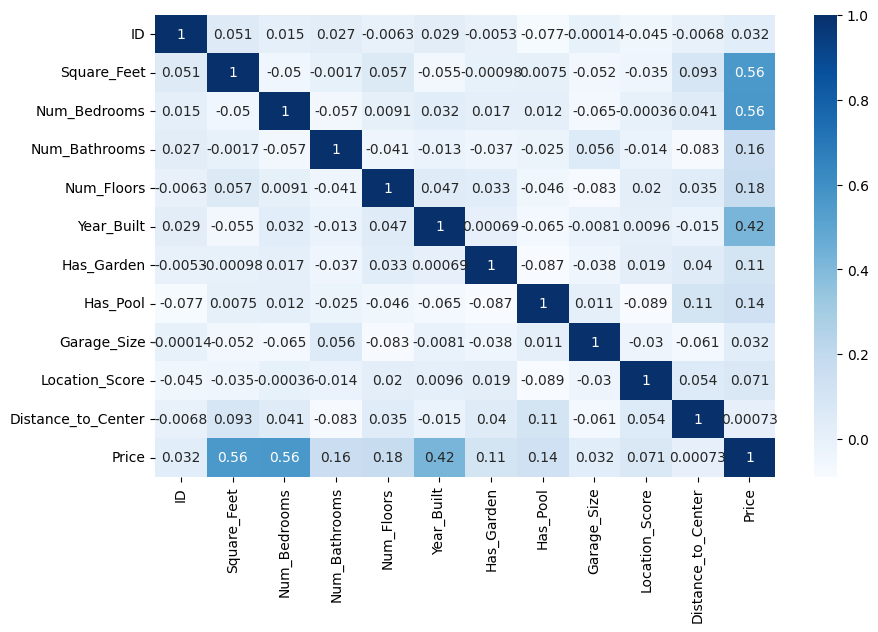

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(housing_data.corr(),annot=True,cmap='Blues')

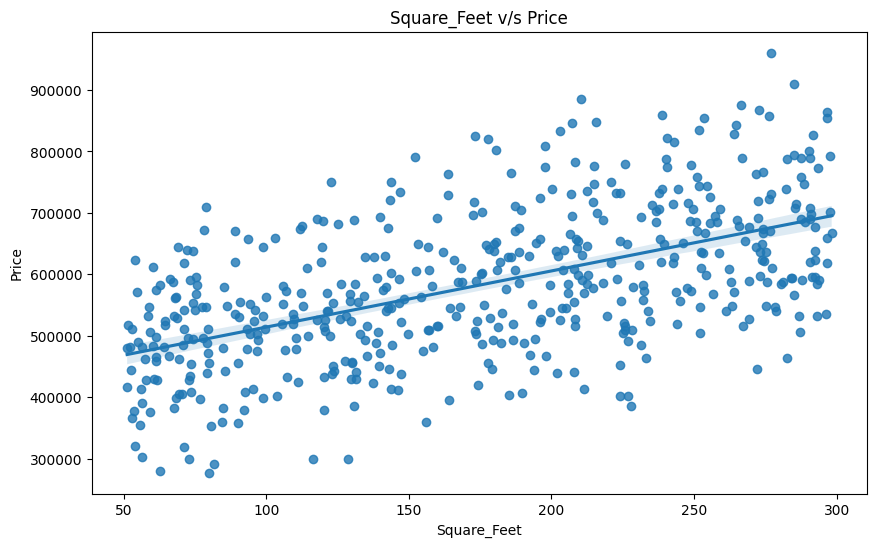

In [11]:
#Regression Plot for Square_Feet v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Square_Feet',y='Price',data=housing_data)
plt.title('Square_Feet v/s Price')
plt.ylabel('Price')
plt.xlabel('Square_Feet')
plt.show()

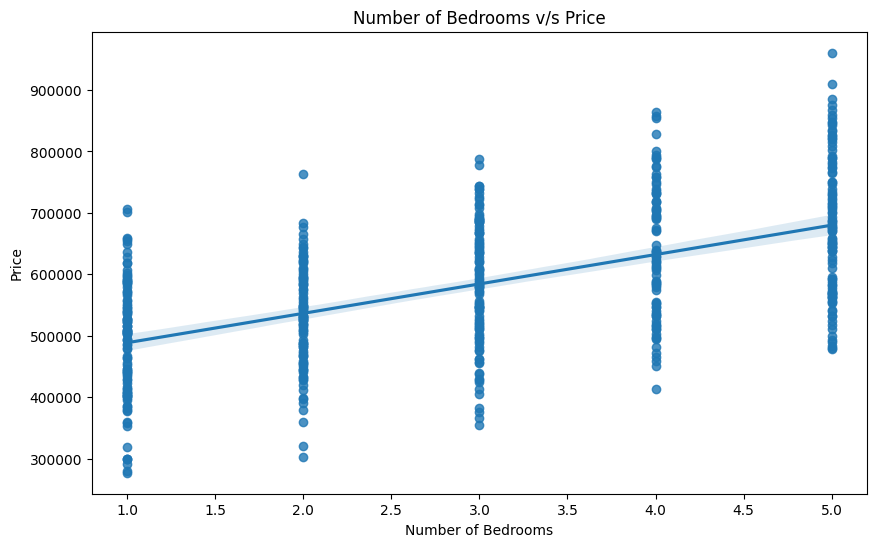

In [12]:
#Regression Plot for  Number of Bedrooms v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Num_Bedrooms',y='Price',data=housing_data)
plt.title('Number of Bedrooms v/s Price')
plt.ylabel('Price')
plt.xlabel('Number of Bedrooms')
plt.show()

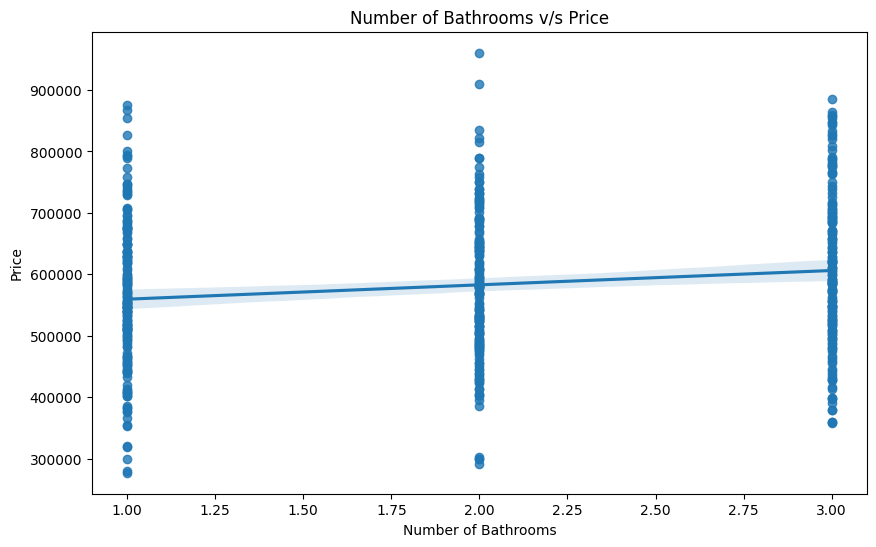

In [13]:
#Regression Plot for  Number of Bathrooms v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Num_Bathrooms',y='Price',data=housing_data)
plt.title('Number of Bathrooms v/s Price')
plt.ylabel('Price')
plt.xlabel('Number of Bathrooms')
plt.show()

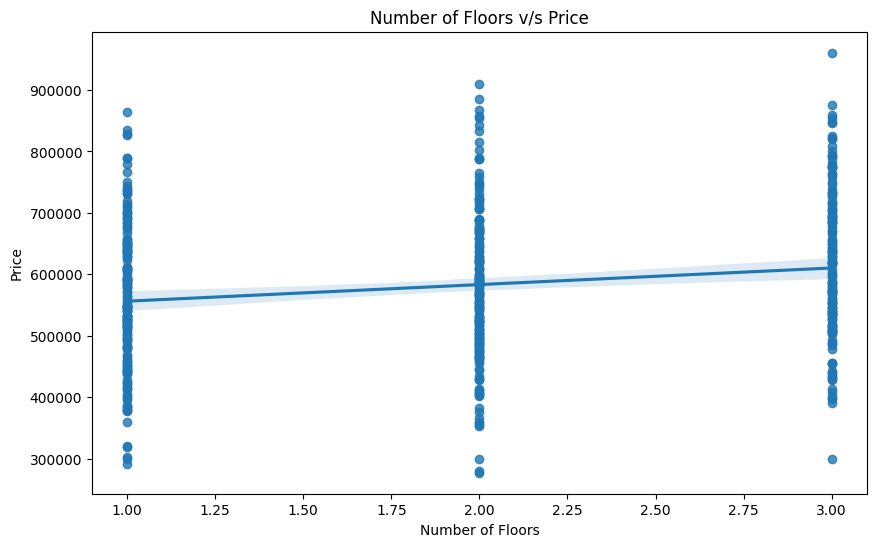

In [14]:
#Regression Plot for  Number of Floors v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Num_Floors',y='Price',data=housing_data)
plt.title('Number of Floors v/s Price')
plt.ylabel('Price')
plt.xlabel('Number of Floors')
plt.show()

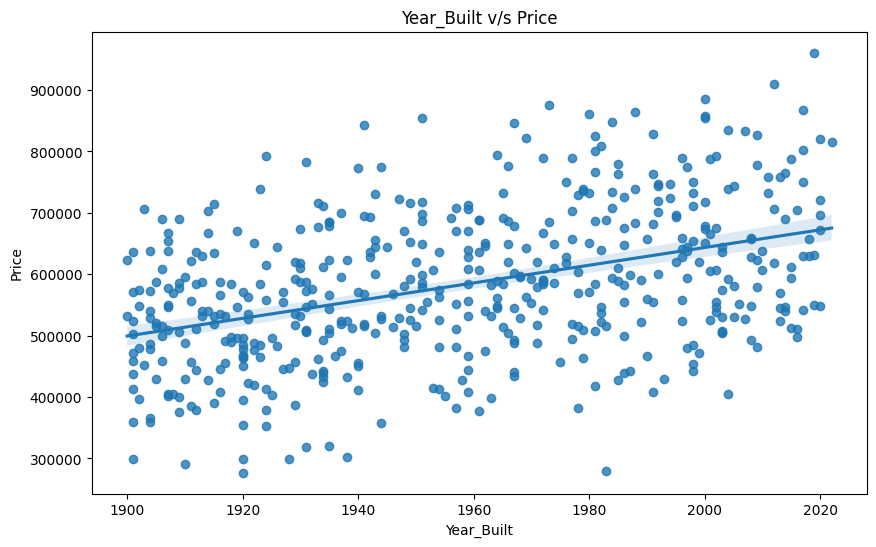

In [15]:
#Regression Plot for  Year_Built v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Year_Built',y='Price',data=housing_data)
plt.title('Year_Built v/s Price')
plt.ylabel('Price')
plt.xlabel('Year_Built')
plt.show()

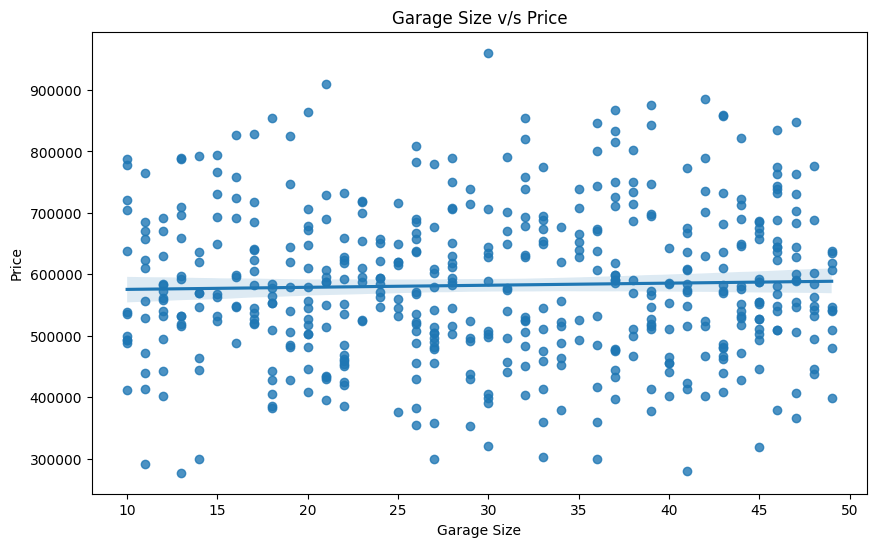

In [16]:
#Regression Plot for  Garage Size v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Garage_Size',y='Price',data=housing_data)
plt.title('Garage Size v/s Price')
plt.ylabel('Price')
plt.xlabel('Garage Size')
plt.show()

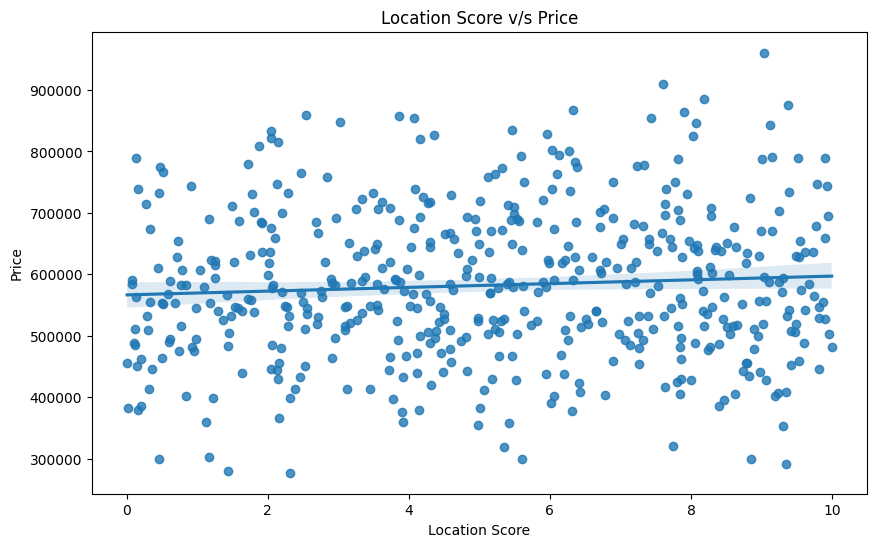

In [17]:
#Regression Plot for  Location Score v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Location_Score',y='Price',data=housing_data)
plt.title('Location Score v/s Price')
plt.ylabel('Price')
plt.xlabel('Location Score')
plt.show()

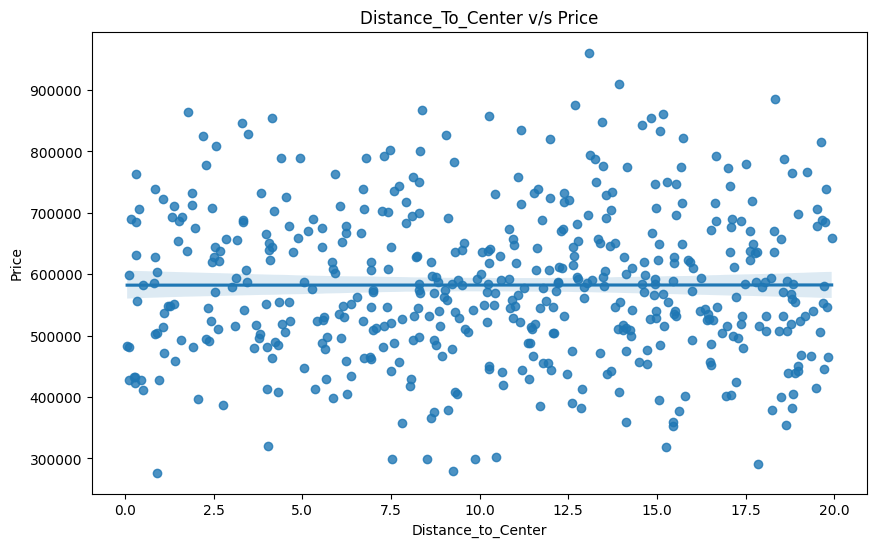

In [18]:
#Regression Plot for  Distance_To_Centre v/s Price
plt.figure(figsize=(10,6))
sns.regplot(x='Distance_to_Center',y='Price',data=housing_data)
plt.title('Distance_To_Center v/s Price')
plt.ylabel('Price')
plt.xlabel('Distance_to_Center')
plt.show()

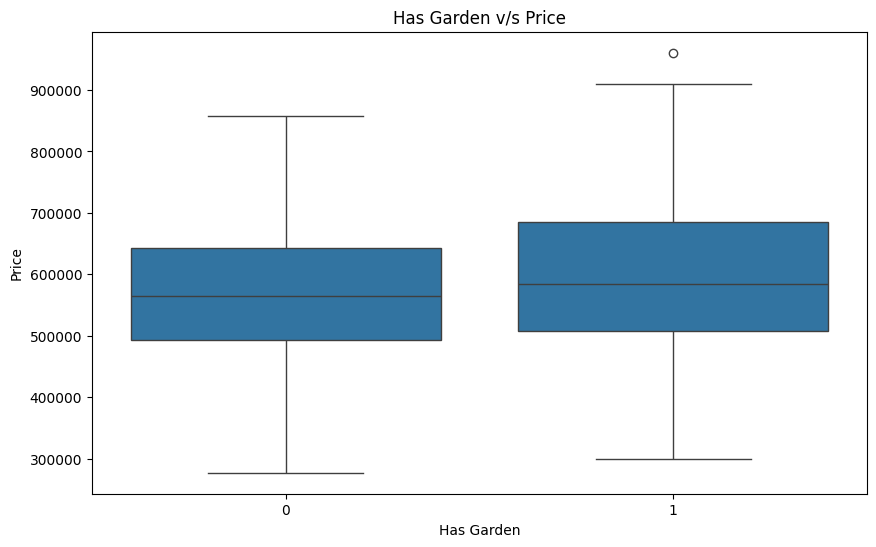

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Has_Garden',y='Price',data=housing_data)
plt.title('Has Garden v/s Price')
plt.ylabel('Price')
plt.xlabel('Has Garden')
plt.show()

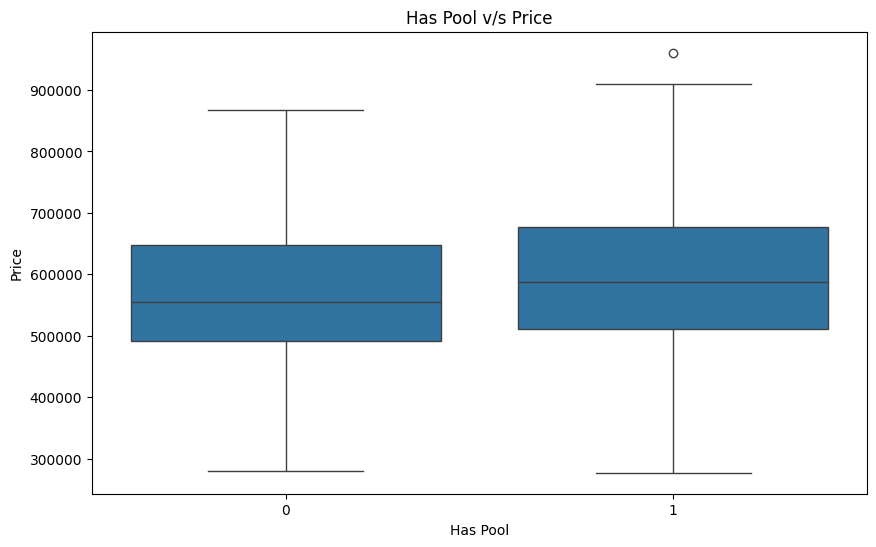

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Has_Pool',y='Price',data=housing_data)
plt.title('Has Pool v/s Price')
plt.ylabel('Price')
plt.xlabel('Has Pool')
plt.show()

#### Linear Regression

In [21]:
X = housing_data[['Square_Feet']]
Y = housing_data['Price']

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y,test_size=0.2,random_state=42)

In [24]:
lr = LinearRegression()
ridge = Ridge()
lasso = Lasso()

In [25]:
lr.fit(X_train,Y_train)

LinearRegression()

In [26]:
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}

In [27]:
lr.score(X_test,Y_test)

0.26694183575084374

In [28]:
grid = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,scoring='r2')

In [29]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [30]:
grid.score(X_test,Y_test)

0.26686849344501395

In [31]:
grid = GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,scoring='r2')

In [32]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [33]:
grid.score(X_test,Y_test)

0.2668988123694609

In [78]:
housing_data.drop('ID',axis=1,inplace=True)

In [ ]:
X = housing_data.drop('Price',axis=1)
Y = housing_data[['Price']]

In [ ]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [ ]:
lr.fit(X_train,Y_train)

In [ ]:
lr.score(X_test,Y_test)

In [ ]:
lr.score(X_train,Y_train)

In [86]:
scores = cross_val_score(lr, X, Y, cv=5, scoring='r2')

In [87]:
scores.mean()

np.float64(0.9747138088248193)

In [88]:
yhat = lr.predict(X_test)

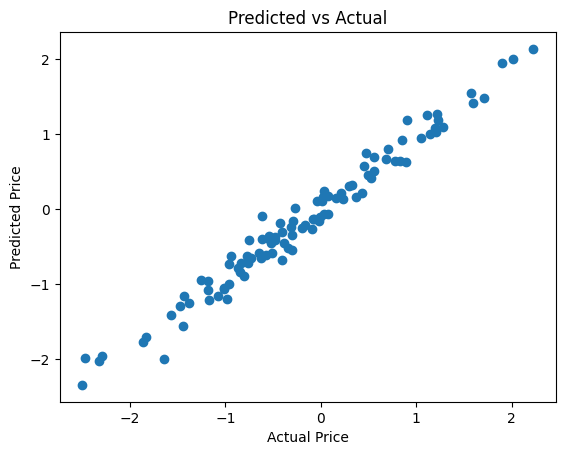

In [89]:
plt.scatter(Y_test,yhat)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual")
plt.show()

In [90]:
r2_score(Y_test,yhat)

0.9708991391697179

In [91]:
mean_squared_error(Y_test,yhat)

0.029336764809664233

In [92]:
root_mean_squared_error(Y_test,yhat)

0.1712797851752046

In [93]:
residuals = Y_test - yhat

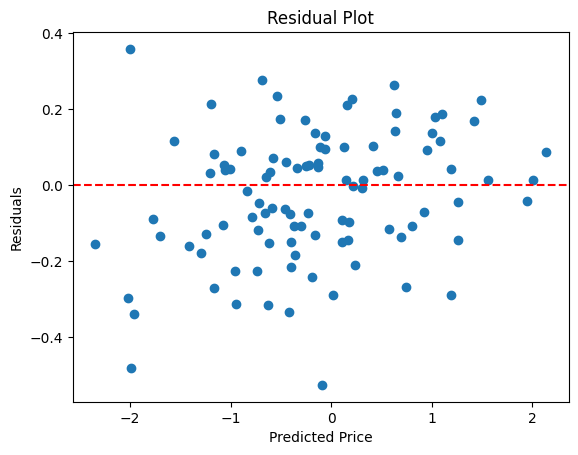

In [94]:
plt.scatter(yhat, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [95]:
feat_imp_df = pd.DataFrame({
    'Features':X.columns,
    'Feature Importance':lr.coef_[0]
}).sort_values(by='Feature Importance',ascending=False)

In [96]:
feat_imp_df

Features  Feature Importance
0         Square_Feet            0.616627
1        Num_Bedrooms            0.591728
4          Year_Built            0.436693
2       Num_Bathrooms            0.203580
6            Has_Pool            0.189281
3          Num_Floors            0.130275
5          Has_Garden            0.123894
8      Location_Score            0.111738
7         Garage_Size            0.107524
9  Distance_to_Center           -0.086073

In [97]:
import joblib

joblib.dump(lr,'house_price_10_feature_model.pkl')
rf_loaded = joblib.load('house_price_10_feature_model.pkl')

In [98]:
X = housing_data[['Square_Feet','Num_Bedrooms','Year_Built','Has_Pool']]
Y = housing_data[['Price']]

In [99]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [100]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [101]:
lr.fit(X_train,Y_train)

LinearRegression()

In [102]:
lr.score(X_test,Y_test)

0.8411940662712576

In [103]:
lr.score(X_train,Y_train)

0.8802275652145456

In [104]:
X.columns

Index(['Square_Feet', 'Num_Bedrooms', 'Year_Built', 'Has_Pool'], dtype='object')

In [105]:
grid = GridSearchCV(estimator=lasso,param_grid=param_grid,cv=5,scoring='r2')

In [106]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [107]:
grid.score(X_test,Y_test)

0.8377392436801516

In [108]:
grid = GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5,scoring='r2')

In [109]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [110]:
grid.score(X_test,Y_test)

0.8409099988301634

In [111]:
X = housing_data[['Square_Feet','Num_Bedrooms','Year_Built','Has_Pool','Num_Floors','Has_Garden']]
Y = housing_data[['Price']]

In [112]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [113]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [114]:
lr.fit(X_train,Y_train)

LinearRegression()

In [115]:
lr.score(X_test,Y_test)

0.8826939763606693

In [116]:
lr.score(X_train,Y_train)

0.9040515210768654

In [117]:
yhat = lr.predict(X_test)

In [118]:
r2_score(Y_test,yhat)

0.8826939763606693

In [119]:
mean_squared_error(Y_test,yhat)

0.11825695625755842

In [120]:
feat_imp_df = pd.DataFrame({
    'Features':X.columns,
    'Feature Importance':lr.coef_[0]
}).sort_values(by='Feature Importance',ascending=False)

In [121]:
feat_imp_df

Features  Feature Importance
0   Square_Feet            0.605331
1  Num_Bedrooms            0.564939
2    Year_Built            0.438595
3      Has_Pool            0.153725
5    Has_Garden            0.110366
4    Num_Floors            0.104516

In [122]:
import joblib

joblib.dump(lr,'house_price_6_feature_model.pkl')
rf_loaded = joblib.load('house_price_6_feature_model.pkl')

#### Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

In [ ]:
X = housing_data.drop('Price',axis=1)
Y = housing_data[['Price']]

In [ ]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],        # number of trees
    'max_depth': [10, 20, 30, 50],         # max depth of trees
    'min_samples_split': [2, 5, 10],             # min samples to split a node
    'min_samples_leaf': [1, 2, 4],               # min samples per leaf
    'criterion': ['squared_error', 'absolute_error']  # type of error used
}

In [ ]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='r2')

In [ ]:
grid.fit(X_train,Y_train)

In [134]:
grid.score(X_test,Y_test)

0.8118784653372136

In [136]:
grid.score(X_train,Y_train)

0.9800165319778195

In [137]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [144]:
X = housing_data[['Square_Feet','Num_Bedrooms','Year_Built','Has_Pool','Num_Floors','Has_Garden']]
Y = housing_data[['Price']]

In [145]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [146]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [147]:
grid = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='r2')

In [ ]:
grid.fit(X_train,Y_train)

In [150]:
grid.score(X_test,Y_test)

0.812643352010967

In [151]:
grid.score(X_train,Y_train)

0.9596408298027767

In [152]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

#### Gradient Boost Regression

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(random_state=42)

In [155]:
param_grid = {
    'n_estimators': [100, 200, 300, 500],      
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 4, 5, 6, 8],             
    'min_samples_split': [2, 5, 10],          
    'min_samples_leaf': [1, 2, 4, 6],         
    'max_features': ['sqrt', 'log2'],   
    'loss': ['squared_error', 'absolute_error'] 
}

In [157]:
grid = GridSearchCV(estimator=gbr,param_grid=param_grid,cv=4,scoring='r2',verbose=2)

In [158]:
X = housing_data.drop('Price',axis=1)
Y = housing_data[['Price']]

In [159]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [160]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [161]:
grid.fit(X_train,Y_train)

Fitting 4 folds for each of 3840 candidates, totalling 15360 fits
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2', verbose=2)

In [162]:
grid.score(X_test,Y_test)

0.9325478900095863

In [163]:
grid.score(X_train,Y_train)

0.9957178548408017

In [164]:
grid.best_params_

{'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [170]:
best_gbr = grid.best_estimator_

In [171]:
feature_imp_df = pd.DataFrame({
    "Feature":X.columns,
    "Importance":best_gbr.feature_importances_
}).sort_values(by='Importance',ascending=False)

In [176]:
yhat = grid.predict(X_test)

In [177]:
r2_score(Y_test,yhat)

0.9325478900095863

In [178]:
mean_squared_error(Y_test,yhat)

0.06799890553908378

In [172]:
feature_imp_df

Feature  Importance
0         Square_Feet    0.340026
1        Num_Bedrooms    0.322853
4          Year_Built    0.198843
2       Num_Bathrooms    0.029402
6            Has_Pool    0.025530
8      Location_Score    0.025372
3          Num_Floors    0.020369
9  Distance_to_Center    0.015271
7         Garage_Size    0.013355
5          Has_Garden    0.008980

In [179]:
joblib.dump(lr,'house_price_gradientboosting_10_feature_model.pkl')
rf_loaded = joblib.load('house_price_gradientboosting_10_feature_model.pkl')

In [174]:
X = housing_data[['Square_Feet','Num_Bedrooms','Year_Built','Has_Pool','Num_Floors','Num_Bathrooms','Location_Score']]
Y = housing_data[['Price']]

In [180]:
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y)

In [181]:
X_train,X_test,Y_train,Y_test = train_test_split(X_scaled,Y_scaled,test_size=0.2,random_state=42)

In [182]:
grid.fit(X_train,Y_train)

Fitting 4 folds for each of 3840 candidates, totalling 15360 fits
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END learning_rate=0.01, loss=squared_error, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(random_state=42),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'loss': ['squared_error', 'absolute_error'],
                         'max_depth': [3, 4, 5, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 500]},
             scoring='r2', verbose=2)

In [183]:
grid.score(X_test,Y_test)

0.8920932297291729

In [184]:
grid.score(X_train,Y_train)

0.9824778873589648

In [185]:
grid.best_params_

{'learning_rate': 0.05,
 'loss': 'squared_error',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'n_estimators': 500}

In [186]:
yhat = grid.predict(X_test)

In [187]:
r2_score(Y_test,yhat)

0.8920932297291729

In [188]:
mean_squared_error(Y_test,yhat)

0.10878150853570609

## Final Conclusion
- We have tried 3 algorithms with different number of features
  1. Linear Regression
     - Simple LR: Train score = 0.31 and Test score = 0.28
     - 10 - feature model: Test